In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np
pd.options.display.max_columns=100
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import Layout,interact,interact_manual,HTML
import pyproj
pyproj.datadir.set_data_dir('/Users/shai/anaconda3/envs/geo_env/share/proj')


In [156]:
incomeDict = {'Low':9000,'Medium':19500,'High':1000000}
Age = {'Under 65':65,
      'Above 65':65}
gridBG = '#f2f2f2'
heightD=375
projectDict = {1:'Addition',
              2:'Reconstruction',
              3:'Raze and Rebuild'}

In [312]:
geoDF = gpd.read_file('simBldgsData09042021.geojson',driver='GeoJSON')
bldDictAddress = dict(zip(geoDF['bld_addres'],geoDF['hebrew_adr']))
aggResByTic = pd.read_excel('aggregated_results_by_project_april17.xlsx')
agentsFile = 'AgentsTimeSeries_Results_april12_1435.xlsx'
res_df = pd.read_excel(agentsFile)
colorFile ='colors_dict_April_13_2021.xlsx'
colorAgeIncomeExcel='age_income_by_color_april_14.xlsx'
colorExcel = pd.read_excel(colorFile)
movementsByProject = pd.read_excel('AggByProjectBeforeAfter_april_18.xlsx', header=[0,1])
projNumberTicDict = dict(zip(aggResByTic['tic'],aggResByTic['ProjNumber']))
projBldNumberDict = dict(zip(geoDF[['project_nu','bld_addres']].groupby('project_nu').agg({'bld_addres':lambda x: x.value_counts().index[0]}).reset_index()['project_nu'],
         geoDF[['project_nu','bld_addres']].groupby('project_nu').agg({'bld_addres':lambda x: x.value_counts().index[0]}).reset_index()['bld_addres']))
#TICS
ticsIndex = aggResByTic['tic']

In [44]:
res_df['stay'] = 0
res_df['stay'] = res_df['status'].apply(lambda x: 1 if x=='stay' else 0)
res_df['leave'] = 0
res_df['leave'] = res_df['status'].apply(lambda x: 1 if x=='leave' else 0)
res_df['New Comers'] = 0
res_df['New Comers'] = res_df['status'].apply(lambda x: 1 if x=='New Comers' else 0)
res_df.fillna(0,inplace=True)
res_df['Under 65'] = 0
res_df['Above 65'] = 0
res_df['Low Income'] = 0
res_df['Medium Income'] = 0
res_df['High Income'] = 0

res_df['Under 65'] = res_df['age'].apply(lambda x: 1 if x<65 else 0)
res_df['Above 65'] = res_df['age'].apply(lambda x: 1 if x>=65 else 0)
res_df['Low Income'] = res_df['income'].apply(lambda x: 1 if (x<incomeDict['Low'])   else 0)
res_df['Medium Income'] = res_df['income'].apply(lambda x: 1 if (x>=incomeDict['Low']) & (x<incomeDict['Medium'])  else 0)
res_df['High Income'] =  res_df['income'].apply(lambda x: 1 if (x>=incomeDict['Medium'])  else 0)
subset_before_after = res_df.copy()
subset_before_after = subset_before_after[subset_before_after['status']!='leave']
subset_before_after['simulationState'] =subset_before_after['tic'].apply(lambda x: 'Before Renewal' if x==0 else 'After Renewal')

In [122]:
ageIncome = subset_before_after[['simulationState','income','age','agentID','tic','ProjNumber']].copy()
ageIncome['ageGroup'] = ageIncome['age'].apply(lambda x: 'Under 65' if x<65 else 'Above 65')
ageIncome['incomeGroup'] = ageIncome['income'].apply(lambda x: 'High Income' if x>=19500  
                                                   else  ('Medium Income' if ((x>=9000)&(x<19500)) else 'Low Income'))

ageIncome = ageIncome[['simulationState','incomeGroup','agentID','ageGroup','tic','ProjNumber']].copy()

In [157]:
res2 = aggResByTic.loc[1:].copy()
res2 = res2[res2.columns[res2.notnull().loc[1].values]].copy()
res2['ProjectTypeDesc'] = res2['prjectType'].apply(lambda x:projectDict[x])

In [158]:
res2.head()

,Unnamed: 0,aprtmentSizeMean,ProjNumber,yearsInBldgMean,aprtmentSizeMeanStay,aprtmentSizeNewComer,AgeMean,AgeMeanNew,AgeMeanStay,AgeOldStayNew,AgeYoungStayNew,AgeOldStay,AgeYoungStay,AgeOldNew,AgeYoungNew,IncomeHighStay,IncomeMedStay,IncomeLowStay,IncomeHighNew,IncomeMedNew,IncomeLowNew,IncomeHighStayNew,IncomeMedStayNew,IncomeLowStayNew,meanIncomeStay,meanIncomeNewComers,meanIncomeStay_N_new,rentCount,ownCount,rentStayCount,rentNewCount,ownStayCount,ownNewCount,TotalAgentsCount,prjectType,tic,stay,new comers,CostForStaying,rentPrice,leave,ProjectTypeDesc
1,1,75.337691,20180988,22.810458,75.081448,82.000000,48.409586,48.470588,48.407240,255.0,663.0,248.0,636.0,7.0,27.0,0.0,369.0,515.0,23.0,11.0,0.0,23.0,380.0,515.0,7699.251131,20246.763158,8163.973799,321,597,310.0,11.0,574.0,23.0,918,1,1,884,34.0,255.628170,0,13,Addition
2,2,75.616379,20100133,22.141164,75.175115,82.000000,48.483836,48.483333,48.483871,256.0,672.0,243.0,625.0,13.0,47.0,0.0,364.0,504.0,40.0,20.0,0.0,40.0,384.0,504.0,7697.449309,20174.978070,8504.186082,325,603,304.0,21.0,564.0,39.0,928,1,2,868,60.0,441.070496,0,29,Addition
3,3,75.587302,20180812,21.439153,75.629977,75.186813,48.366138,49.307692,48.265808,256.0,689.0,236.0,618.0,20.0,71.0,0.0,356.0,498.0,40.0,51.0,0.0,40.0,407.0,498.0,7658.194379,18781.043378,8729.283542,324,621,297.0,27.0,557.0,64.0,945,1,3,854,91.0,606.108847,0,43,Addition
4,4,76.027112,20181092,20.617310,75.605232,79.033898,48.442127,50.067797,48.214031,258.0,701.0,231.0,610.0,27.0,91.0,0.0,350.0,491.0,66.0,52.0,0.0,66.0,402.0,491.0,7639.385256,19569.922391,9107.376269,329,630,291.0,38.0,550.0,80.0,959,1,4,841,118.0,810.857831,0,56,Addition
5,5,76.627907,20171974,19.788675,75.894231,80.515924,48.542973,50.254777,48.219952,264.0,725.0,228.0,604.0,36.0,121.0,0.0,346.0,486.0,98.0,59.0,0.0,98.0,405.0,486.0,7620.582933,19983.318304,9583.120297,339,650,286.0,53.0,546.0,104.0,989,2,5,832,157.0,1067.265228,0,65,Reconstruction


In [13]:
class simWidgets:
    styled = {'description_width': 'initial'}
    def __init__(self):
        self.tics =widgets.IntRangeSlider(
            value=[0, 1],
            min=0,
            max=30,
            step=1,
            description='Simulation Tics:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            layout=Layout(width='100%'),
            style=simWidgets.styled
        )


In [14]:
simWidg = simWidgets()
simWidg.tics.min = ticsIndex.values.min()
simWidg.tics.max = ticsIndex.values.max()

In [450]:
def g(x):
    startTic = x[0]
    lastTic = x[1]
    if lastTic>0:
        if startTic==11:
            startTic=12
        if lastTic==11:
            lastTic=12
        projectNum = projNumberTicDict[lastTic]
        bldNumber = projBldNumberDict[projectNum]
        hebAddres = bldDictAddress[bldNumber]
        projectTypeDesc = res2.query(f'tic=={lastTic}')['ProjectTypeDesc'].values[0]
        h = HTML(value=f"<h2>Execution: {x[1]} &nbsp; Project Number: {projectNum}<br/> Hebrew Address: {hebAddres}<br/>Project Type: {projectTypeDesc}</h2>")
        figure_1(startTic,lastTic)
        figure_2(startTic,lastTic)
        figure_3(startTic,lastTic)
        figure_4(startTic,lastTic)
        figure_5(startTic,lastTic)
        figure_6(lastTic)
        display(h)
    else:
        h = HTML(value=f"<h2>Tick: {x[1]}</h2>")
        display(h)
    #return (x[0]*2)

In [451]:
i = interact_manual(g, x=simWidg.tics)
i.widget.children[1].description = 'Submit'


interactive(children=(IntRangeSlider(value=(1, 13), continuous_update=False, description='Simulation Tics:', l…

In [163]:
res2.query(f'tic=={10}')['ProjectTypeDesc'].values[0]

'Reconstruction'

In [17]:
aggResByTic.head()

,Unnamed: 0,aprtmentSizeMean,ProjNumber,yearsInBldgMean,aprtmentSizeMeanStay,aprtmentSizeNewComer,AgeMean,AgeMeanNew,AgeMeanStay,AgeOldStayNew,AgeYoungStayNew,AgeOldStay,AgeYoungStay,AgeOldNew,AgeYoungNew,IncomeHighStay,IncomeMedStay,IncomeLowStay,IncomeHighNew,IncomeMedNew,IncomeLowNew,IncomeHighStayNew,IncomeMedStayNew,IncomeLowStayNew,meanIncomeStay,meanIncomeNewComers,meanIncomeStay_N_new,rentCount,ownCount,rentStayCount,rentNewCount,ownStayCount,ownNewCount,TotalAgentsCount,prjectType,tic,stay,new comers,CostForStaying,rentPrice,leave
0,0,74.914158,NaN,23.526198,NaN,NaN,48.357860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318,579,NaN,NaN,NaN,NaN,897,0,0,897,NaN,NaN,0,0
1,1,75.337691,20180988,22.810458,75.081448,82.000000,48.409586,48.470588,48.407240,255.0,663.0,248.0,636.0,7.0,27.0,0.0,369.0,515.0,23.0,11.0,0.0,23.0,380.0,515.0,7699.251131,20246.763158,8163.973799,321,597,310.0,11.0,574.0,23.0,918,1,1,884,34.0,255.628170,0,13
2,2,75.616379,20100133,22.141164,75.175115,82.000000,48.483836,48.483333,48.483871,256.0,672.0,243.0,625.0,13.0,47.0,0.0,364.0,504.0,40.0,20.0,0.0,40.0,384.0,504.0,7697.449309,20174.978070,8504.186082,325,603,304.0,21.0,564.0,39.0,928,1,2,868,60.0,441.070496,0,29
3,3,75.587302,20180812,21.439153,75.629977,75.186813,48.366138,49.307692,48.265808,256.0,689.0,236.0,618.0,20.0,71.0,0.0,356.0,498.0,40.0,51.0,0.0,40.0,407.0,498.0,7658.194379,18781.043378,8729.283542,324,621,297.0,27.0,557.0,64.0,945,1,3,854,91.0,606.108847,0,43
4,4,76.027112,20181092,20.617310,75.605232,79.033898,48.442127,50.067797,48.214031,258.0,701.0,231.0,610.0,27.0,91.0,0.0,350.0,491.0,66.0,52.0,0.0,66.0,402.0,491.0,7639.385256,19569.922391,9107.376269,329,630,291.0,38.0,550.0,80.0,959,1,4,841,118.0,810.857831,0,56


In [19]:
    stayingC = colorExcel.query('label=="Staying"')['colors_'].values[0]
    leavingC = colorExcel.query('label=="Leaving"')['colors_'].values[0]
    newComerC = colorExcel.query('label=="New Comers"')['colors_'].values[0]
    aC = colorExcel.query('label=="Addition"')['colors_'].values[0]
    rC = colorExcel.query('label=="Reconstruction"')['colors_'].values[0]
    rrC = colorExcel.query('label=="Raze and Rebuild"')['colors_'].values[0]
    totalPopC = colorExcel.query('label=="Total Pop"')['colors_'].values[0]

    lowIncomeC = colorExcel.loc[colorExcel['label']=='Moderate','colors_'].values[0]
    medIncomeC = colorExcel.loc[colorExcel['label']=='Middle','colors_'].values[0]
    upIncomeC = colorExcel.loc[colorExcel['label']=='Upper','colors_'].values[0]


In [38]:
def figure_1(start=1,end=1):
    widthD=800
    genericGraph = res2.query(f"tic>={start} & tic<={end}").copy()
    genericGraph.loc[genericGraph['prjectType']==1,'Project Type '] = 'Addition'
    genericGraph.loc[genericGraph['prjectType']==2,'Project Type '] = 'Reconstruction'
    genericGraph.loc[genericGraph['prjectType']==3,'Project Type '] = 'Raze and Rebuild'
    genericGraph['y_shift'] =-20
    # Change the bar mode
    aTics = genericGraph.loc[genericGraph['prjectType'] == 1, 'tic']
    aYshift =genericGraph.loc[genericGraph['prjectType'] == 1, 'y_shift']

    rTics = genericGraph.loc[genericGraph['prjectType'] == 2, 'tic']
    rYshift = genericGraph.loc[genericGraph['prjectType'] == 2, 'y_shift']

    rrTics = genericGraph.loc[genericGraph['prjectType'] == 3, 'tic']
    rrYshift = genericGraph.loc[genericGraph['prjectType'] == 3, 'y_shift']
    titlesList = ['Staying','New Comers','Total (Staying+New Comers)']
    colList = ['stay','new comers','TotalAgentsCount']
    colorList = [stayingC,newComerC,totalPopC]
    styleList = [dict(color=stayingC, width=4), dict(color=newComerC, width=4), dict(color=totalPopC, dash='dash')] 


    fig = go.Figure()
    for i in range(3):
        fig.add_trace(go.Scatter(
            x=genericGraph['tic'],
            y=genericGraph[colList[i]],
            line=styleList[i],
            name=titlesList[i]
        ))


    maxY=3300
    for xtic in aTics:
        fig.add_shape(type="line", x0=xtic, y0=0, x1=xtic, y1=maxY, line=dict(
            color=aC, width=1.5, dash="dot"), layer="below")

    for xtic in rTics:
        fig.add_shape(type="line", x0=xtic, y0=0, x1=xtic, y1=maxY, line=dict(
            color=rC, width=1.5, dash="dot"), layer="below")

    for xtic in rrTics:
        fig.add_shape(type="line", x0=xtic, y0=0, x1=xtic, y1=maxY,
                      line=dict(color=rrC, width=1.5, dash="dot"), layer="below")


    fig.add_trace(go.Scatter(name='Addition', x=aTics, y=aYshift,
                             mode='markers', marker=dict(color=aC)))
    fig.add_trace(go.Scatter(name='Reconstruction', x=rTics, y=rYshift,
                             mode='markers', marker=dict(color=rC)))
    fig.add_trace(go.Scatter(name='Raze and Rebuild', x=rrTics,
                             y=rrYshift, mode='markers', marker=dict(color=rrC)))

    fig.update_layout(width=widthD,height=heightD, title='Household Absolute change within simulation tics')
    fig.update_yaxes(title='Household Count',range=[-100, maxY],gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
    fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
    fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)',legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01,bgcolor='rgba(255,255,255,0.75)'))
    with out1:
        out1.clear_output()
        fig.show()

In [21]:
out1 = widgets.Output()
out1

Output()

In [39]:
def figure_2(start,end):
    widthD=800
    genericGraph = res2.query(f"tic>={start} & tic<={end}").copy()
    title_ ='Percent Income by Group Staying Vs New Comers'
    y_title = 'Household Percent'
    columnsList = ['IncomeHighStay','IncomeMedStay','IncomeLowStay','IncomeHighNew','IncomeMedNew','IncomeLowNew','IncomeHighStayNew','IncomeMedStayNew','IncomeLowStayNew']
    titlesList = ['High Stay','Med Stay','Low Stay','High New Comer','Med New Comer','Low New Comer','High (average)','Medium (average)','Low (average)']
    legendGroup =['Staying','Staying','Staying','New Comers','New Comers','New Comers','Average','Average','Average']
    styleList = [dict(color=upIncomeC,width=2),
                 dict(color=medIncomeC,width=2),
                 dict(color=lowIncomeC,width=2),
                 dict(color=upIncomeC,width=4),
                 dict(color=medIncomeC,width=4),
                 dict(color=lowIncomeC,width=4),
                 dict(color='hsv(30,50%,100%)',dash='dash'),
                 dict(color='hsv(30,75%,100%)', dash='dash'),
                 dict(color='hsv(30,100%,50%)', dash='dash')]
    percentList=[]
    for i in range(9):
        percentList.append(f'{columnsList[i]}Percent')
        genericGraph[percentList[i]] = genericGraph[columnsList[i]]/genericGraph['TotalAgentsCount']
    genericGraph['y_shift'] =-0.02
    # Change the bar mode
    aTics = genericGraph.loc[genericGraph['prjectType'] == 1, 'tic']
    rTics = genericGraph.loc[genericGraph['prjectType'] == 2, 'tic']
    rrTics = genericGraph.loc[genericGraph['prjectType'] == 3, 'tic']
    
    aYshift =genericGraph.loc[genericGraph['prjectType'] == 1, 'y_shift']
    rYshift = genericGraph.loc[genericGraph['prjectType'] == 2, 'y_shift']
    rrYshift = genericGraph.loc[genericGraph['prjectType'] == 3, 'y_shift']
    maxY=1
    fig = go.Figure()
    for i in range(9):
        fig.add_trace(go.Scatter(
            x=genericGraph['tic'],
            y=genericGraph[percentList[i]],
            legendgroup = legendGroup[i],
            line=styleList[i],
            name=titlesList[i]
        ))
    for xtic in aTics:
        fig.add_shape(type="line", x0=xtic, y0=0, x1=xtic, y1=maxY, line=dict(
            color=aC, width=1.5, dash="dot"), layer="below")

    for xtic in rTics:
        fig.add_shape(type="line", x0=xtic, y0=0, x1=xtic, y1=maxY, line=dict(
            color=rC, width=1.5, dash="dot"), layer="below")

    for xtic in rrTics:
        fig.add_shape(type="line", x0=xtic, y0=0, x1=xtic, y1=maxY,
                      line=dict(color=rrC, width=1.5, dash="dot"), layer="below")

    fig.add_trace(go.Scatter(name='Addition', x=aTics, y=aYshift,
                             mode='markers', legendgroup='Building Type', marker=dict(color=aC)))
    fig.add_trace(go.Scatter(name='Reconstruction',legendgroup='Building Type',  x=rTics, y=rYshift,
                             mode='markers', marker=dict(color=rC)))
    fig.add_trace(go.Scatter(name='Raze and Rebuild',legendgroup='Building Type',  x=rrTics,
                             y=rrYshift, mode='markers', marker=dict(color=rrC)))


    fig.update_layout(width=widthD,height=heightD, title=title_)
    fig.update_yaxes(title=y_title,range=[-0.05, maxY],gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')

    fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
    fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)',legend=dict(orientation='h',yanchor="top", y=1.0, xanchor="left", x=0.03,bgcolor='rgba(255,255,255,0.5)'))

    with out2:
        out2.clear_output()
        fig.show()

In [23]:
out2 = widgets.Output()
out2

Output()

In [375]:
figure_2(1,10)

In [135]:
def figure_3(start,end):
    widthD=800

    genericGraph = res2.query(f"tic>={start} & tic<={end}").copy()
    above65C = colorExcel.loc[colorExcel['label']=='65-84','colors_'].values[0]
    below65C = colorExcel.loc[colorExcel['label']=='18-44','colors_'].values[0]
    averageBelowAgeC = colorExcel.loc[colorExcel['label']=='45-64','colors_'].values[0]
    averageAboveAgeC = colorExcel.loc[colorExcel['label']=='85+','colors_'].values[0]
    
    title_ ='Above and Below 65 troughout the simulation'
    y_title = 'Household Percent'
    #totalPopC
    columnsList = ['AgeYoungStay','AgeOldStay','AgeYoungNew','AgeOldNew','AgeYoungStayNew','AgeOldStayNew']
    titlesList = ['Under 65 Stay','Above 65 Stay','Under 65 New Comers','Above 65 New Comers','Under 65 (Average)','Above 65 (Average)']
    legendGroup =['Staying','Staying','New Comers','New Comers','Average','Average']
    styleList = [dict(color=below65C,width=2),
                 dict(color=above65C,width=2),
                 dict(color=below65C,width=4),
                 dict(color=above65C,width=4),
                 dict(color=averageBelowAgeC,dash='dash'),
                 dict(color=averageAboveAgeC, dash='dash')]
    percentList=[]
    for i in range(6):
        percentList.append(f'{columnsList[i]}Percent')
        genericGraph[percentList[i]] = genericGraph[columnsList[i]]/genericGraph['TotalAgentsCount']
    genericGraph['y_shift'] =-0.02
    # Change the bar mode
    aTics = genericGraph.loc[genericGraph['prjectType'] == 1, 'tic']
    rTics = genericGraph.loc[genericGraph['prjectType'] == 2, 'tic']
    rrTics = genericGraph.loc[genericGraph['prjectType'] == 3, 'tic']
    
    aYshift =genericGraph.loc[genericGraph['prjectType'] == 1, 'y_shift']
    rYshift = genericGraph.loc[genericGraph['prjectType'] == 2, 'y_shift']
    rrYshift = genericGraph.loc[genericGraph['prjectType'] == 3, 'y_shift']
    maxY=1
    fig = go.Figure()
    for i in range(6):
        fig.add_trace(go.Scatter(
            x=genericGraph['tic'],
            y=genericGraph[percentList[i]],
            legendgroup = legendGroup[i],
            line=styleList[i],
            name=titlesList[i]
        ))
    for xtic in aTics:
        fig.add_shape(type="line", x0=xtic, y0=0, x1=xtic, y1=maxY, line=dict(
            color=aC, width=1.5, dash="dot"), layer="below")

    for xtic in rTics:
        fig.add_shape(type="line", x0=xtic, y0=0, x1=xtic, y1=maxY, line=dict(
            color=rC, width=1.5, dash="dot"), layer="below")

    for xtic in rrTics:
        fig.add_shape(type="line", x0=xtic, y0=0, x1=xtic, y1=maxY,
                      line=dict(color=rrC, width=1.5, dash="dot"), layer="below")

    fig.add_trace(go.Scatter(name='Addition', x=aTics, y=aYshift,
                             mode='markers', legendgroup='Building Type', marker=dict(color=aC)))
    fig.add_trace(go.Scatter(name='Reconstruction',legendgroup='Building Type',  x=rTics, y=rYshift,
                             mode='markers', marker=dict(color=rC)))
    fig.add_trace(go.Scatter(name='Raze and Rebuild',legendgroup='Building Type',  x=rrTics,
                             y=rrYshift, mode='markers', marker=dict(color=rrC)))


    fig.update_layout(width=widthD,height=heightD, title=title_)
    fig.update_yaxes(title=y_title,range=[-0.05, maxY],gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')

    fig.update_xaxes(title='Simulation tic',gridwidth=1, gridcolor=gridBG,zerolinewidth=1,zerolinecolor='lightgrey')
    fig.update_layout(showlegend=True,plot_bgcolor='rgba(0,0,0,0)',legend=dict(orientation='h',yanchor="top", y=1.0, xanchor="left", x=0.03,bgcolor='rgba(255,255,255,0.5)'))

    with out3:
        out3.clear_output()
        fig.show()

In [136]:
out3 = widgets.Output()
out3

Output()

In [145]:
def figure_4(start,end):
    genericGraph = res2.query(f"tic>={start} & tic<={end}").copy()
    uniProList = genericGraph['ProjNumber'].unique()
    ageIncomeCopy = ageIncome[ageIncome['ProjNumber'].isin(uniProList)].copy()
    ageIncomeAgg = ageIncomeCopy.groupby(['simulationState','ageGroup','incomeGroup']).agg({'agentID':'count'}).reset_index()
    ageIncomeAgg['Age_income'] = ageIncomeAgg['ageGroup'] + " " + ageIncomeAgg['incomeGroup']
    ageIncomeAgg.rename(columns={'ageGroup':'Age Group','incomeGroup':'Income Group','agentID':'Count'},inplace=True)

    ageIncomeColr = pd.read_excel(colorAgeIncomeExcel,usecols=['Age_income','color'])
    ageIncomeColorDict = dict(zip(ageIncomeColr['Age_income'],ageIncomeColr['color']))
    title_ = 'Age Group Vs Income Before and After Renewal'
    fig = px.scatter(ageIncomeAgg, x="Age Group", y="Income Group",
                size="Count",facet_col='simulationState', title=title_,size_max=30,
                category_orders={"Age Group": ["Under 65","Above 65"],"Income Group": ['High Income', 'Medium Income', 'Low Income'],"simulationState":['Before Renewal','After Renewal']},color='Age_income',color_discrete_map=ageIncomeColorDict,width=700,height=heightD)
    fig.update_yaxes(gridwidth=1, gridcolor='#d9d9d9',zerolinewidth=1,zerolinecolor='lightgrey',title='')
    fig.update_xaxes(gridwidth=1, gridcolor='#d9d9d9',zerolinewidth=1,zerolinecolor='lightgrey',title='')
    fig.update_layout(plot_bgcolor='#f2f7ff')
    fig.layout['annotations'][0]['text'] = 'Before Renewal'
    fig.layout['annotations'][1]['text'] = 'After Renewal'
    fig.update_traces(showlegend=False)
    with out4:
        out4.clear_output()
        fig.show()

In [146]:
out4 = widgets.Output()
out4

Output()

In [440]:
def figure_5(start,end):
    startLine = aggResByTic.query(f'tic=={start}')
    endLine = aggResByTic.query(f'tic=={end}')
    statsDict = {'aprtmentSizeMean:':{'before':round(startLine['aprtmentSizeMean'].values[0],1),
                       'after':round(endLine['aprtmentSizeMean'].values[0],1),
                        'title':'Apartment Size',
                         'units':'sq meters'},
     'yearsInBldgMean:':{'before':round(startLine['yearsInBldgMean'].values[0],1),
                       'after':round(endLine['yearsInBldgMean'].values[0],1),
                        'title':'Years in Neighborhood',
                         'units':'years'},
     'CostForStaying:':{'before':round(startLine['CostForStaying'].values[0],1),
                       'after':round(endLine['CostForStaying'].values[0],1),
                        'title':'Cost For Staying',
                         'units':'₪'},
     'meanIncomeStay_N_new:':{'before':round(startLine['meanIncomeStay_N_new'].values[0],1),
                       'after':round(endLine['meanIncomeStay_N_new'].values[0],1),
                        'title':'Mean Income',
                         'units':'₪'}
    }
    htmlText = ""
    for key in statsDict.keys():
        htmlText+=("<span><b>"+f"{statsDict[key]['title']}</b></span> Start Marker: <b>{statsDict[key]['before']}  {statsDict[key]['units']} </b> End Marker <b> {statsDict[key]['after']} {statsDict[key]['units']}</b><br/>")
    htmlText = "<div style='font-size:15px'>"+htmlText+"</div>"
    Htats = HTML(value=htmlText)
    with out5:
        out5.clear_output()
        display(Htats)

In [441]:
out5 = widgets.Output()
out5

Output()

In [447]:
def figure_6(end):
    projectMovement = movementsByProject[movementsByProject['Tic']['after']==end]
    projType = projectMovement['Type of Project']['after'].values[0]
    Leaving_Owners = projectMovement['Leaving Owners']['after'].values[0]
    Leaving_Renters = projectMovement['Leaving Renters']['after'].values[0]
    New_Owners = projectMovement['New Owners']['after'].values[0]
    New_Renters = projectMovement['New Renters']['after'].values[0]
    Staying = projectMovement['Staying']['after'].values[0]
    Total_Households =New_Owners+New_Renters+Staying
    Total_Households_before = projectMovement['Total Households']['before'].values[0]


    if projType>1:
        bldX =5
        bldY = 1.5
        oldBldX = 2.5
        oldBldY =1.5
        outOwnX = 1
        outOwnY = 1.25
        outRentX = 1
        outRentY = 1.85
        inOwnX = 4
        inOwnY = 2.25
        inRentX = 2
        inRentY = 2.25
        df = pd.DataFrame({'x':[outOwnX,outRentX,oldBldX,oldBldX,inRentX,inOwnX,bldX],
                           'y':[outOwnY,outRentY,oldBldY,oldBldY,inRentY,inOwnY,bldY],
                           'Agents':[Leaving_Owners,Leaving_Renters,Total_Households_before,Staying,New_Renters,New_Owners,Total_Households],
                           'who':['Leaving Owners','Leaving Renters','Total Before','Surviving Owners','New Renters','New Owners','Total After'],
                           'color':['cornflowerblue','lightgreen','lemonchiffon','lightskyblue','green','deepskyblue','white']})
        colorDict = dict(zip(df['who'],df['color']))
        fig = px.scatter(df, x='x', y='y', color="who",color_discrete_map=colorDict,size='Agents',size_max=50)
        #building to Leaving Owners
        fig.add_annotation(x=outOwnX,y=outOwnY,ax=oldBldX,ay=oldBldY,xref='x',yref='y',axref='x',ayref='y',arrowcolor='lightgray',text='',showarrow=True,arrowhead=3,arrowsize=1,arrowwidth=3)
        #Building Leaving Renters
        fig.add_annotation(x=outRentX,y=outRentY,ax=oldBldX,ay=oldBldY,xref='x',yref='y',axref='x',ayref='y',arrowcolor='lightgray',text='',showarrow=True,arrowhead=3,arrowsize=1,arrowwidth=3)
        #Entering Owners
        fig.add_annotation(x=bldX,y=bldY,ax=inOwnX,ay=inOwnY,xref='x',yref='y',axref='x',ayref='y',arrowcolor='lightgray',text='',showarrow=True,arrowhead=3,arrowsize=1,arrowwidth=3)
        #Entering Renters
        fig.add_annotation(x=bldX,y=bldY,ax=inRentX,ay=inRentY,xref='x',yref='y',axref='x',ayref='y',arrowcolor='lightgray',text='',showarrow=True,arrowhead=3,arrowsize=1,arrowwidth=3)
        # From Old Building to New Building
        fig.add_annotation(x=bldX,y=bldY,ax=oldBldX,ay=oldBldY,xref='x',yref='y',axref='x',ayref='y',arrowcolor='lightgray',text='',showarrow=True,arrowhead=3,arrowsize=1,arrowwidth=3)


    else:
        bldX =1.3
        bldY = 1.3
        outOwnX = 1
        outOwnY = 1.25
        outRentX = 1.1
        outRentY = 1.85
        inOwnX = 1.25
        inOwnY = 2.25
        inRentX = 1.1
        inRentY = 2.25
        df = pd.DataFrame({'x':[outOwnX,outRentX,bldX,bldX,inRentX,inOwnX,bldX],
                           'y':[outOwnY,outRentY,bldY,bldY,inRentY,inRentY,bldY],
                           'Agents':[Leaving_Owners,Leaving_Renters,Total_Households_before,Staying,New_Renters,New_Owners,Total_Households],
                           'who':['Leaving Owners','Leaving Renters','Total Before','Surviving Owners','New Renters','New Owners','Total After'],
                           'color':['cornflowerblue','lightgreen','lemonchiffon','lightskyblue','green','deepskyblue','white']})
        colorDict = dict(zip(df['who'],df['color']))
        fig = px.scatter(df, x='x', y='y', color="who",color_discrete_map=colorDict,size='Agents',size_max=50)
        #building to Leaving Owners
        fig.add_annotation(x=outOwnX,y=outOwnY,ax=bldX,ay=bldY,xref='x',yref='y',axref='x',ayref='y',arrowcolor='lightgray',text='',showarrow=True,arrowhead=3,arrowsize=1,arrowwidth=3)
        #Building Leaving Renters
        fig.add_annotation(x=outRentX,y=outRentY,ax=bldX,ay=bldY,xref='x',yref='y',axref='x',ayref='y',arrowcolor='lightgray',text='',showarrow=True,arrowhead=3,arrowsize=1,arrowwidth=3)
        #Entering Owners
        fig.add_annotation(x=bldX,y=bldY,ax=inOwnX,ay=inOwnY,xref='x',yref='y',axref='x',ayref='y',arrowcolor='lightgray',text='',showarrow=True,arrowhead=3,arrowsize=1,arrowwidth=3)
        #Entering Renters
        fig.add_annotation(x=bldX,y=bldY,ax=inRentX,ay=inRentY,xref='x',yref='y',axref='x',ayref='y',arrowcolor='lightgray',text='',showarrow=True,arrowhead=3,arrowsize=1,arrowwidth=3)


    #old house to displaced owner


    fig.add_trace(go.Scatter(x=df['x'],y=df['y'],text=df['Agents'],mode="text"))

    fig.update_layout(
        margin=dict(l=0, r=0, b=0),
        height=400, width=600,
        plot_bgcolor="white",
        legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.95)
    )
    fig.update_traces(marker=dict(line=dict(width=2,color='DarkSlateGrey')))
    fig.update_yaxes(visible=False, showticklabels=False)
    fig.update_xaxes(visible=False, showticklabels=False)
    with out6:
        out6.clear_output()
        fig.show()

In [448]:
out6 = widgets.Output()
out6

Output()

In [488]:
figure_6(32)

In [541]:
projectMovement

Unnamed: 0_level_0 Total Households        bldCode        Avg Floors  \
             bldStaus            after before   after before      after   
23        502-0196659            712.0  200.0     4.0   10.0       30.0   

          Apartment Size Sq Meters        Years in Building         \
   before                    after before             after before   
23    0.0                     98.0   73.0               7.0   24.9   

   Average Age        average income         Nubmer of renters         \
         after before          after  before             after before   
23        47.9   45.4        18281.0  3927.0             269.0   90.0   

   Number of owners        Leaving Renters        Leaving Owners         \
              after before           after before          after before   
23            443.0  110.0            90.0    0.0           62.0    0.0   

   New Renters        New Owners        Type of Project          Tic         \
         after before      after before           after before after before   
23       179.0    0.0      333.0    0.0             3.0    0.0   9.0    0.0   

   Cost For Staying        Ratio Cost For Staying        Staying         \
              after before                  after before   after before   
23           6111.0    0.0                   0.26    0.0    48.0  200.0   

   New Comers        Leaving        Under 65        Above 65         \
        after before   after before    after before    after before   
23      512.0    0.0   152.0    0.0    556.0  154.0    156.0   46.0   

   Low Income        Medium Income        High Income         \
        after before         after before       after before   
23      174.0  174.0          26.0   26.0       512.0    0.0   

   Before or After Renewal          
                     after  before  
23                   after  before

In [543]:
floorsAfter

30.0

In [544]:
bldAfter

4.0

In [545]:
projType

3.0

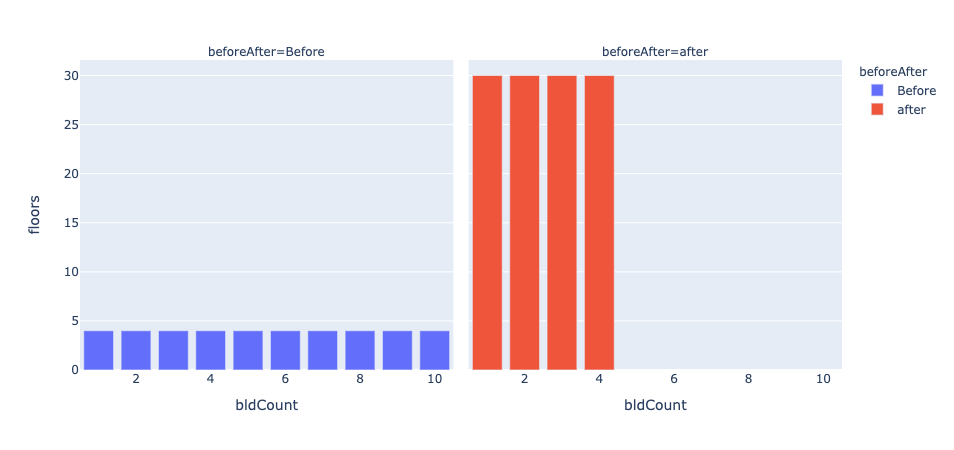

In [554]:
projectMovement = movementsByProject[movementsByProject['Tic']['after']==9].copy()
projType = projectMovement['Type of Project']['after'].values[0]
bldBefore = projectMovement['bldCode']['before'].values[0]
bldAfter = projectMovement['bldCode']['after'].values[0]
floorsBefore = projectMovement['Avg Floors']['before'].values[0]
floorsAfter = projectMovement['Avg Floors']['after'].values[0]

bldNumList = [i for i in range(1,int(bldBefore)+1)] + [i for i in range(1,int(bldAfter)+1)]
if projType>1:
    floorList = [4 for i in range(1,int(bldBefore)+1)] + [floorsAfter for i in range(1,int(bldAfter)+1)]
else:
    floorList = [4 for i in range(1,int(bldBefore)+1)] + [floorsAfter-4 for i in range(1,int(bldAfter)+1)]
beforeAfterList = ['Before' for i in range(1,int(bldBefore)+1)]+ ['after' for i in range(1,int(bldAfter)+1)]
df = pd.DataFrame({'bldCount':bldNumList,'beforeAfter':beforeAfterList,'floors':floorList})
if projType>1:
    fig = px.bar(df, x='bldCount', y='floors',color='beforeAfter',facet_col='beforeAfter')
else:
    fig = px.bar(df, x='bldCount', y='floors',color='beforeAfter')
fig.show()

In [547]:
floorList

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 30.0, 30.0, 30.0, 30.0]

In [548]:
bldNumList

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4]

In [550]:
df

,bldCount,beforeAfter,floors
0,1,Before,4.0
1,2,Before,4.0
2,3,Before,4.0
3,4,Before,4.0
4,5,Before,4.0
5,6,Before,4.0
6,7,Before,4.0
7,8,Before,4.0
8,9,Before,4.0
9,10,Before,4.0


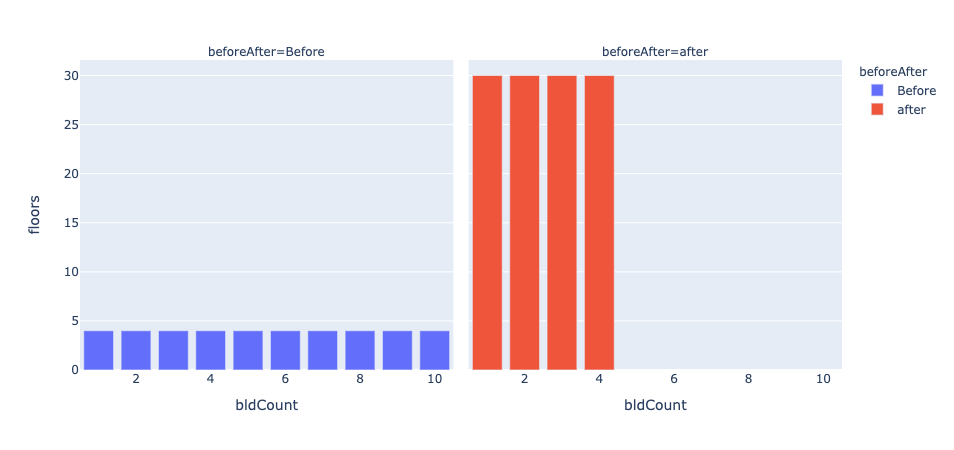

In [459]:
movementsByProject

Unnamed: 0_level_0 Total Households        bldCode        Avg Floors  \
             bldStaus            after before   after before      after   
0          ProjNumber              NaN    NaN     NaN    NaN        NaN   
1            20100133             40.0   16.0     1.0    1.0        6.0   
2            20110270             48.0   18.0     1.0    1.0        7.0   
3            20120894             77.0   16.0     1.0    1.0        6.0   
4            20140060             40.0   15.0     1.0    1.0        7.0   
5            20140231             34.0    6.0     1.0    1.0        9.0   
6            20140467             41.0   16.0     1.0    1.0        7.0   
7            20140556             45.0   16.0     1.0    1.0        7.0   
8            20141182             40.0   12.0     1.0    1.0        3.0   
9            20150274             50.0   12.0     1.0    1.0        3.0   
10           20150857             47.0   12.0     1.0    1.0        8.0   
11           20160319             62.0   33.0     1.0    1.0        6.0   
12           20170076            112.0    4.0     3.0    1.0       10.0   
13           20171974             54.0   13.0     1.0    1.0       10.0   
14           20180345             76.0   39.0     1.0    1.0        8.0   
15           20180812             47.0   17.0     1.0    1.0        7.0   
16           20180845             48.0   22.0     1.0    1.0        7.0   
17           20180988             56.0   20.0     1.0    1.0        7.0   
18           20181092             45.0   16.0     1.0    1.0        7.0   
19           20181295             71.0   24.0     1.0    1.0        7.0   
20        502-0147678            232.0   12.0     2.0    1.0       18.0   
21        502-0178285            293.0   84.0     2.0    3.0       34.0   
22        502-0189720            207.0   27.0     3.0    3.0       20.0   
23        502-0196659            712.0  200.0     4.0   10.0       30.0   
24        502-0201483            234.0   17.0     2.0    1.0       15.0   
25        502-0316588            193.0   38.0     3.0    2.0       16.0   
26        502-0316752             72.0    2.0     2.0    2.0        6.0   
27        502-0317495            269.0   70.0     2.0    5.0       28.0   
28        502-0368860            153.0   29.0     1.0    1.0       32.0   
29        502-0424911            115.0   18.0     2.0    2.0       13.0   
30        502-0583948             78.0    9.0     2.0    1.0       11.0   
31        502-0654715            337.0   64.0     3.0    2.0       24.0   

          Apartment Size Sq Meters        Years in Building         \
   before                    after before             after before   
0     NaN                      NaN    NaN               NaN    NaN   
1     0.0                     82.0   70.0              11.8   29.6   
2     0.0                     92.0   80.0              10.4   27.8   
3     0.0                     72.0   60.0               5.0   23.9   
4     0.0                     82.0   70.0              10.0   26.5   
5     0.0                    115.0   90.0               1.9   10.7   
6     0.0                    102.0   90.0               9.5   24.4   
7     0.0                     82.0   70.0              10.7   30.0   
8     0.0                    112.0  100.0               7.0   23.5   
9     0.0                     92.0   80.0               8.1   33.9   
10    0.0                    115.0   90.0               7.3   28.4   
11    0.0                    102.0   90.0              13.0   24.5   
12    0.0                     75.0   50.0               0.2    6.8   
13    0.0                     85.0   60.0               3.6   15.2   
14    0.0                     92.0   80.0              13.1   25.5   
15    0.0                     62.0   50.0               6.7   18.6   
16    0.0                     98.0   86.0               6.5   14.2   
17    0.0                     82.0   70.0               7.1   19.8   
18    0.0                     92.0   80.0           